# Box Office

Kaggle TMDB Box Office Prediction Competition 2019

Authors: Sean Trinh, Hariharan Vijayachandran

Part 1 - Process the data.

In [1]:
def get_data():
    #Get the training and testing data
    return [pd.read_csv('./data/train.csv'), pd.read_csv('./data/test.csv')]

def drop(to_drop, train, test):
    #Drop specified attributes from the training and test data sets
    for x in to_drop:
        try:
            train = train.drop(x, axis = 1)
            if x != 'revenue':
                test = test.drop(x, axis = 1)
        except:
            pass
    return [train, test]

def split_to_validate(train, fraction, random):
    #Split training data into training and validation data
    ret_train = train.sample(frac=fraction, random_state=random)
    ret_test = train.drop(ret_train.index)
    return [ret_train, ret_test]

def ap(x):
    #Convert years (ex: 86 -> 1986, 15 -> 2015)
    if type(x) == str:
        x = int(x.split('/')[2])
        if x<=19:
            return 2000+x
        else:
            return 1900+x
    else:
        return 0

In [2]:
'''
    Process the data.
'''
import pandas as pd

#Get training and test data for all models
train_df, test_df = get_data()
cc_train, cc_test = get_data()
date_train, date_test = get_data()

#Train all models on the same training and validation data
training, validation = split_to_validate(train_df, 0.7, 200)

train = training
test = validation
cc_train_s = training
cc_test_s = validation
date_train_s = training
date_test_s = validation

train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [4]:
#ALL ATTRIBUTES
ALL_ATTRIBUTES = ['id','belongs_to_collection','budget','genres','homepage','imdb_id','original_language',
                 'original_title','overview','popularity','poster_path','production_companies',
                 'production_countries','release_date','runtime','spoken_languages', 'status', 'tagline',
                 'title','Keywords','cast','crew','revenue']

In [5]:
to_drop = ['release_date','id','genres','homepage','original_title','title','original_language','overview',
           'production_companies','production_countries','spoken_languages','status','tagline',
           'belongs_to_collection', 'imdb_id','poster_path','Keywords','cast','crew']
_, test_df = drop(to_drop, train_df, test_df) #testing
train, test = drop(to_drop, train, test) #training and validation

#cc_train, cc_test
to_drop1 = ['budget','runtime','popularity','release_date','id','genres','homepage','original_title',
            'title','original_language','overview','production_companies','production_countries',
            'spoken_languages','status','tagline','belongs_to_collection', 'imdb_id','poster_path','Keywords']
_, cc_test = drop(to_drop1, cc_train, cc_test) #testing
cc_train_s, cc_test_s = drop(to_drop1, cc_train_s, cc_test_s) #training and validation

#Count the number of cast members
cc_train_s['cast'] = cc_train_s['cast'].apply(lambda x: x.count('{') if type(x)==str else 0)
cc_test_s['cast'] = cc_test_s['cast'].apply(lambda x: x.count('{') if type(x)==str else 0)
cc_test['cast'] = cc_test['cast'].apply(lambda x: x.count('{') if type(x)==str else 0)

#Count the number of crew members
cc_train_s['crew'] = cc_train_s['crew'].apply(lambda x: x.count('{') if type(x)==str else 0)
cc_test_s['crew'] = cc_test_s['crew'].apply(lambda x: x.count('{') if type(x)==str else 0)
cc_test['crew'] = cc_test['crew'].apply(lambda x: x.count('{') if type(x)==str else 0)

#date_train, date_test
to_drop2 = ['budget','runtime','popularity','id','genres','homepage','original_title','title','original_language',
            'overview','production_companies','production_countries','spoken_languages','status','tagline',
            'belongs_to_collection', 'imdb_id','poster_path','Keywords','cast','crew']
_, date_test = drop(to_drop2, date_train, date_test) #testing
date_train_s, date_test_s = drop(to_drop2, date_train_s, date_test_s) #training and validation

#Get month and year
date_train_s['release_month'] = date_train_s['release_date'].apply(lambda x:int(x.split('/')[0]) if type(x)==str else 0 )
date_train_s['release_year'] = date_train_s['release_date'].apply(lambda x:int(x.split('/')[2])if type(x)==str else 0 )

date_test_s['release_month'] = date_test_s['release_date'].apply(lambda x:int(x.split('/')[0])if type(x)==str else 0 )
date_test_s['release_year'] = date_test_s['release_date'].apply(lambda x:int(x.split('/')[2]) if type(x)==str else 0)

date_test['release_month'] = date_test['release_date'].apply(lambda x:int(x.split('/')[0])if type(x)==str else 0 )
date_test['release_year'] = date_test['release_date'].apply(lambda x:int(x.split('/')[2]) if type(x)==str else 0)

#Convert year 
date_train_s['release_year'] = date_train_s['release_date'].apply(ap)
date_test_s['release_year'] = date_test_s['release_date'].apply(ap)
date_test['release_year'] = date_test['release_date'].apply(ap)

#Drop the release_date itself
date_train_s.drop('release_date',axis = 1, inplace = True)
date_test_s.drop('release_date',axis = 1, inplace = True)
date_test.drop('release_date',axis = 1, inplace = True)


In [6]:
train.head()

,budget,popularity,runtime,revenue
2585,0,5.244560,83.0,1406224
2611,0,16.759454,107.0,84431625
219,2600000,2.203949,105.0,3166000
2204,40000000,10.829432,109.0,28169671
251,98000000,7.284477,119.0,10017322


In [7]:
cc_train_s.head()

,cast,crew,revenue
2585,18,16,1406224
2611,29,37,84431625
219,14,8,3166000
2204,24,7,28169671
251,31,16,10017322


In [8]:
date_train_s.head()

,revenue,release_month,release_year
2585,1406224,6,2011
2611,84431625,4,1989
219,3166000,7,2004
2204,28169671,10,2009
251,10017322,12,1995


In [9]:
#Print Lengths of training and validation data sets
print(len(train))
print(len(test))
print(len(cc_train_s))
print(len(cc_test_s))
print(len(date_train_s))
print(len(date_test_s))

2100
900
2100
900
2100
900


In [10]:
import numpy as np
def f(x):
    if x<0:
        return 0
    return x

#Model 1
train = train.apply(np.log)
train = train.applymap(f)
train = train.fillna(0)
X = train.drop('revenue', axis = 1)
Y = train['revenue']

test = test.apply(np.log)
test = test.applymap(f)
test = test.fillna(0)
X_test =test.drop('revenue',axis = 1)
Y_test = test['revenue']

#Model 2
cc_train_s['revenue'] = cc_train_s['revenue'].apply(np.log)
cc_train_s = cc_train_s.applymap(f)
cc_train_s = cc_train_s.fillna(0)
X1 = cc_train_s.drop('revenue',axis = 1)
Y1 = cc_train_s['revenue']

cc_test_s['revenue'] = cc_test_s['revenue'].apply(np.log)
cc_test_s = cc_test_s.applymap(f)
cc_test_s = cc_test_s.fillna(0)
X1_test = cc_test_s.drop('revenue', axis = 1)
Y1_test = cc_test_s['revenue']

#Model 3
date_train_s['revenue'] = date_train_s['revenue'].apply(np.log)
date_train_s = date_train_s.applymap(f)
date_train_s = date_train_s.fillna(0)
X2 = date_train_s.drop('revenue', axis = 1)
Y2 = date_train_s['revenue']

date_test_s['revenue'] = date_test_s['revenue'].apply(np.log)
date_test_s = date_test_s.applymap(f)
date_test_s = date_test_s.fillna(0)
X2_test = date_test_s.drop('revenue', axis = 1)
Y2_test = date_test_s['revenue']

#Model 1
train.head()

,budget,popularity,runtime,revenue
2585,0.000000,1.657191,4.418841,14.156419
2611,0.000000,2.818963,4.672829,18.251453
219,14.771022,0.790251,4.653960,14.967980
2204,17.504390,2.382268,4.691348,17.153756
251,18.400478,1.985746,4.779123,16.119826


In [11]:
cc_train_s.head()

,cast,crew,revenue
2585,18,16,14.156419
2611,29,37,18.251453
219,14,8,14.967980
2204,24,7,17.153756
251,31,16,16.119826


In [12]:
date_train_s.head()

,revenue,release_month,release_year
2585,14.156419,6,2011
2611,18.251453,4,1989
219,14.967980,7,2004
2204,17.153756,10,2009
251,16.119826,12,1995


In [17]:
from keras import models, layers, regularizers, optimizers
def model1(X, Y, X_test, Y_test):
    model1 = models.Sequential()
    model1.add(layers.Dense(356, activation='relu', input_shape=(X.shape[1],)))
    model1.add(layers.Dropout(0.1))
    model1.add(layers.Dense(256, activation='relu'))
    model1.add(layers.Dense(10,activation='relu'))
    model1.add(layers.Dense(1))
    
    model1.compile(optimizer=optimizers.rmsprop(lr=1e-5),loss='mse',metrics=['mean_squared_logarithmic_error'])
    history = model1.fit(X,Y,epochs=40, batch_size = 32, validation_data=(X_test, Y_test))
    return [model1, history]

Using TensorFlow backend.


In [18]:
def model2(X1, Y1, X1_test, Y1_test): 
    model2 = models.Sequential()
    model2.add(layers.Dense(356, activation='relu', input_shape=(X1.shape[1],)))
    #model2.add(layers.Dropout(0.1))
    model2.add(layers.BatchNormalization())
    model2.add(layers.Dense(256, activation='relu'))
    model2.add(layers.Dense(10,activation='relu'))
    model2.add(layers.Dense(1))

    model2.compile(optimizer=optimizers.rmsprop(lr=1e-5),loss='mse',metrics=['mean_squared_logarithmic_error'])
    history = model2.fit(X1, Y1, epochs=40, batch_size = 32, validation_data=(X1_test, Y1_test))
    return [model2, history]

In [19]:
def model3(X2, Y2, X2_test, Y2_test):
    model3 = models.Sequential()
    model3.add(layers.Dense(356, activation='relu', input_shape=(X2.shape[1],)))
    model3.add(layers.Dropout(0.1))
    model3.add(layers.Dense(256, activation='relu'))
    model3.add(layers.Dense(10,activation='relu'))
    model3.add(layers.Dense(1))

    model3.compile(optimizer=optimizers.rmsprop(lr=1e-5),loss='mse',metrics=['mean_squared_logarithmic_error'])
    history = model3.fit(X2, Y2, epochs=100, batch_size = 32, validation_data=(X2_test, Y2_test))
    
    return [model3, history]
    

MODEL 1 - BUDGET, RUNTIME, AND POPULARITY

In [20]:
model1, history1 = model1(X, Y, X_test, Y_test)
model1.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 2100 samples, validate on 900 samples
Epoch 1/40
2100/2100 [==============================] - 0s 194us/step - loss: 221.0743 - mean_squared_logarithmic_error: 4.1528 - val_loss: 203.6481 - val_mean_squared_logarithmic_error: 3.2512
Epoch 2/40
2100/2100 [==============================] - 0s 71us/step - loss: 191.1194 - mean_squared_logarithmic_error: 2.8653 - val_loss: 175.5955 - val_mean_squared_logarithmic_error: 2.3590
Epoch 3/40
2100/2100 [==============================] - 0s 74us/step - loss: 163.6772 - mean_squared_logarithmic_error: 2.1024 - val_loss: 149.6271 - val_mean_squared_logarithmic_error: 1.7706
Epoch 4/40
2100/2100 [==============================] - 0s 79us/step - loss: 138.5829 - mean_squared_logarithmic_error: 1.5939 - val_loss:

2100/2100 [==============================] - 0s 79us/step - loss: 5.8721 - mean_squared_logarithmic_error: 0.0567 - val_loss: 5.6851 - val_mean_squared_logarithmic_error: 0.0565
Epoch 39/40
2100/2100 [==============================] - 0s 74us/step - loss: 5.8887 - mean_squared_logarithmic_error: 0.0569 - val_loss: 5.6639 - val_mean_squared_logarithmic_error: 0.0565
Epoch 40/40
2100/2100 [==============================] - 0s 74us/step - loss: 5.9223 - mean_squared_logarithmic_error: 0.0569 - val_loss: 5.6526 - val_mean_squared_logarithmic_error: 0.0566
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 356)               1424      
_________________________________________________________________
dropout_1 (Dropout)          (None, 356)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)      

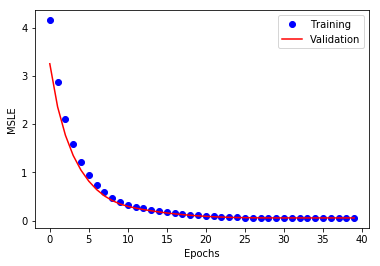

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history1.history['mean_squared_logarithmic_error']
val_acc = history1.history['val_mean_squared_logarithmic_error']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MSLE')
plt.legend()
plt.show()

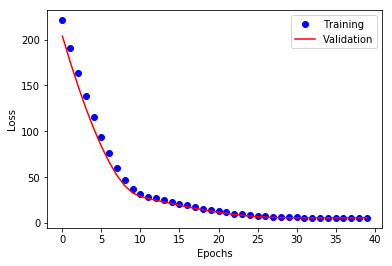

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

l1 = history1.history['loss']
l2 = history1.history['val_loss']

epochs = range(len(l1))

plt.plot(epochs, l1, 'bo', label='Training')
plt.plot(epochs, l2, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

MODEL 2 - NUMBER OF CREW AND NUMBER OF CAST

In [23]:
model2, history2 = model2(X1, Y1, X1_test, Y1_test)
model2.summary()

Train on 2100 samples, validate on 900 samples
Epoch 1/40
2100/2100 [==============================] - 1s 329us/step - loss: 260.3229 - mean_squared_logarithmic_error: 6.8909 - val_loss: 252.2861 - val_mean_squared_logarithmic_error: 6.2112
Epoch 2/40
2100/2100 [==============================] - 0s 87us/step - loss: 243.9378 - mean_squared_logarithmic_error: 5.5346 - val_loss: 239.0786 - val_mean_squared_logarithmic_error: 5.0691
Epoch 3/40
2100/2100 [==============================] - 0s 79us/step - loss: 231.7934 - mean_squared_logarithmic_error: 4.5998 - val_loss: 227.9833 - val_mean_squared_logarithmic_error: 4.3322
Epoch 4/40
2100/2100 [==============================] - 0s 80us/step - loss: 220.0248 - mean_squared_logarithmic_error: 3.9297 - val_loss: 216.8258 - val_mean_squared_logarithmic_error: 3.7682
Epoch 5/40
2100/2100 [==============================] - 0s 79us/step - loss: 207.7705 - mean_squared_logarithmic_error: 3.3727 - val_loss: 206.0140 - val_mean_squared_logarithmic_e

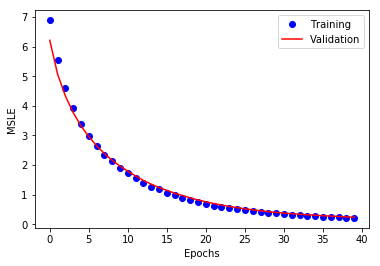

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history2.history['mean_squared_logarithmic_error']
val_acc = history2.history['val_mean_squared_logarithmic_error']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MSLE')
plt.legend()
plt.show()

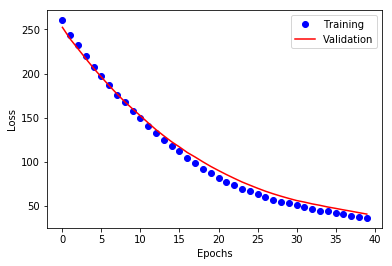

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

l1 = history2.history['loss']
l2 = history2.history['val_loss']

epochs = range(len(l1))

plt.plot(epochs, l1, 'bo', label='Training')
plt.plot(epochs, l2, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

MODEL 3 - RELEASE YEAR AND RELEASE MONTH

In [26]:
model3, history3 = model3(X2, Y2, X2_test, Y2_test)
model3.summary()

Train on 2100 samples, validate on 900 samples
Epoch 1/100
2100/2100 [==============================] - 1s 244us/step - loss: 2602.8060 - mean_squared_logarithmic_error: 5.9190 - val_loss: 129.2115 - val_mean_squared_logarithmic_error: 1.0879
Epoch 2/100
2100/2100 [==============================] - 0s 71us/step - loss: 553.4817 - mean_squared_logarithmic_error: 3.0530 - val_loss: 358.6851 - val_mean_squared_logarithmic_error: 7.9390
Epoch 3/100
2100/2100 [==============================] - 0s 71us/step - loss: 290.8328 - mean_squared_logarithmic_error: 3.1124 - val_loss: 264.5331 - val_mean_squared_logarithmic_error: 7.9005
Epoch 4/100
2100/2100 [==============================] - 0s 69us/step - loss: 206.4438 - mean_squared_logarithmic_error: 2.6701 - val_loss: 148.8692 - val_mean_squared_logarithmic_error: 1.4216
Epoch 5/100
2100/2100 [==============================] - 0s 68us/step - loss: 106.8930 - mean_squared_logarithmic_error: 0.9725 - val_loss: 33.3987 - val_mean_squared_logarith

2100/2100 [==============================] - 0s 76us/step - loss: 11.0620 - mean_squared_logarithmic_error: 0.0761 - val_loss: 12.0087 - val_mean_squared_logarithmic_error: 0.0783
Epoch 44/100
2100/2100 [==============================] - 0s 71us/step - loss: 10.9592 - mean_squared_logarithmic_error: 0.0761 - val_loss: 12.1299 - val_mean_squared_logarithmic_error: 0.0786
Epoch 45/100
2100/2100 [==============================] - 0s 74us/step - loss: 10.9927 - mean_squared_logarithmic_error: 0.0757 - val_loss: 11.0466 - val_mean_squared_logarithmic_error: 0.0757
Epoch 46/100
2100/2100 [==============================] - 0s 99us/step - loss: 11.0615 - mean_squared_logarithmic_error: 0.0763 - val_loss: 11.1224 - val_mean_squared_logarithmic_error: 0.0759
Epoch 47/100
2100/2100 [==============================] - 0s 89us/step - loss: 10.9565 - mean_squared_logarithmic_error: 0.0784 - val_loss: 11.9188 - val_mean_squared_logarithmic_error: 0.0780
Epoch 48/100
2100/2100 [========================

2100/2100 [==============================] - 0s 79us/step - loss: 10.0542 - mean_squared_logarithmic_error: 0.0726 - val_loss: 11.3180 - val_mean_squared_logarithmic_error: 0.0764
Epoch 86/100
2100/2100 [==============================] - 0s 76us/step - loss: 10.0396 - mean_squared_logarithmic_error: 0.0730 - val_loss: 11.1401 - val_mean_squared_logarithmic_error: 0.0759
Epoch 87/100
2100/2100 [==============================] - 0s 78us/step - loss: 9.7896 - mean_squared_logarithmic_error: 0.0714 - val_loss: 12.2206 - val_mean_squared_logarithmic_error: 0.0789
Epoch 88/100
2100/2100 [==============================] - 0s 76us/step - loss: 10.1596 - mean_squared_logarithmic_error: 0.0731 - val_loss: 11.5955 - val_mean_squared_logarithmic_error: 0.0771
Epoch 89/100
2100/2100 [==============================] - 0s 76us/step - loss: 10.1063 - mean_squared_logarithmic_error: 0.0730 - val_loss: 11.3820 - val_mean_squared_logarithmic_error: 0.0766
Epoch 90/100
2100/2100 [=========================

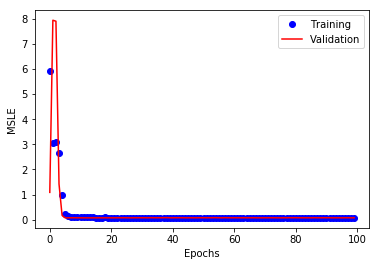

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history3.history['mean_squared_logarithmic_error']
val_acc = history3.history['val_mean_squared_logarithmic_error']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MSLE')
plt.legend()
plt.show()

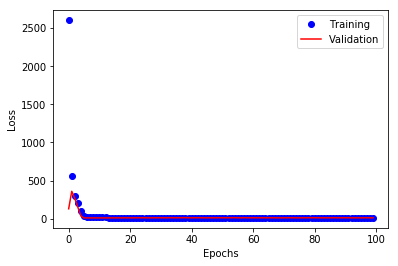

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

l1 = history3.history['loss']
l2 = history3.history['val_loss']

epochs = range(len(l1))

plt.plot(epochs, l1, 'bo', label='Training')
plt.plot(epochs, l2, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

ENSEMBLE

In [29]:
#MODEL ONE
test_df = test_df.apply(np.log)
test_df = test_df.applymap(f)
test_df = test_df.fillna(0)
result_X_train_1 = model1.predict(X)
result_X_validation_1 = model1.predict(X_test) #Get prediction

#MODEL TWO
cc_test = cc_test.applymap(f)
cc_test = cc_test.fillna(0)
result_X_train_2 = model2.predict(X1)
result_X_validation_2 = model2.predict(X1_test) #Get prediction

#MODEL THREE
date_test = date_test.applymap(f)
date_test = date_test.fillna(0)
result_X_train_3 = model3.predict(X2)
result_X_validation_3 = model3.predict(X2_test) #Get prediction

#Create data frames for ensemble model training using predictions from all models
training_data_ensemble = pd.DataFrame({'result1':result_X_train_1.reshape(result_X_train_1.shape[0]),
                                       'result2':result_X_train_2.reshape(result_X_train_2.shape[0]),
                                       'result3':result_X_train_3.reshape(result_X_train_3.shape[0])})
training_Y_ensemble = Y
validation_data_ensemble = pd.DataFrame({'result1':result_X_validation_1.reshape(result_X_validation_1.shape[0]),
                                         'result2':result_X_validation_2.reshape(result_X_validation_2.shape[0]),
                                         'result3':result_X_validation_3.reshape(result_X_validation_3.shape[0])})
validation_Y_ensemble = Y_test

#Create the Ensemble model
model_e = models.Sequential()
model_e.add(layers.Dense(356, activation='relu', input_shape=(training_data_ensemble.shape[1],)))
model_e.add(layers.Dropout(0.1))
model_e.add(layers.Dense(256, activation='relu'))
model_e.add(layers.Dense(10,activation='relu'))
model_e.add(layers.Dense(1))    
model_e.compile(optimizer=optimizers.rmsprop(lr=1e-5),loss='mse',metrics=['mean_squared_logarithmic_error'])
history_e = model_e.fit(training_data_ensemble, training_Y_ensemble, epochs=40, batch_size = 32,
                        validation_data=(validation_data_ensemble, validation_Y_ensemble))

Train on 2100 samples, validate on 900 samples
Epoch 1/40
2100/2100 [==============================] - 1s 280us/step - loss: 249.1069 - mean_squared_logarithmic_error: 5.9820 - val_loss: 226.0183 - val_mean_squared_logarithmic_error: 4.0512
Epoch 2/40
2100/2100 [==============================] - 0s 69us/step - loss: 213.2780 - mean_squared_logarithmic_error: 3.4661 - val_loss: 195.7415 - val_mean_squared_logarithmic_error: 2.6628
Epoch 3/40
2100/2100 [==============================] - 0s 69us/step - loss: 183.1926 - mean_squared_logarithmic_error: 2.3007 - val_loss: 167.7166 - val_mean_squared_logarithmic_error: 1.8449
Epoch 4/40
2100/2100 [==============================] - 0s 68us/step - loss: 156.5341 - mean_squared_logarithmic_error: 1.6192 - val_loss: 142.7000 - val_mean_squared_logarithmic_error: 1.3259
Epoch 5/40
2100/2100 [==============================] - 0s 73us/step - loss: 132.2590 - mean_squared_logarithmic_error: 1.1671 - val_loss: 119.6000 - val_mean_squared_logarithmic_e

GET PREDICTION USING ENSEMBLE METHOD

In [30]:
#Get test predictions
test_m1_prediction = model1.predict(test_df)
test_m2_prediction = model2.predict(cc_test)
test_m3_prediction = model3.predict(date_test)
test_data_ensemble = pd.DataFrame({'result1':test_m1_prediction.reshape(test_m1_prediction.shape[0]),
                                   'result2':test_m2_prediction.reshape(test_m2_prediction.shape[0]),
                                   'result3':test_m3_prediction.reshape(test_m3_prediction.shape[0])})
test_ensemble_prediction = model_e.predict(test_data_ensemble)
test_ensemble_prediction = np.exp(test_ensemble_prediction)

#Generate the submission CSV
output_df = pd.read_csv('./data/test.csv')
for x in ALL_ATTRIBUTES:
    try:
        if x != 'revenue'and x != 'id':
            output_df = output_df.drop(x, axis=1)
    except:
        pass

output_df['revenue'] = test_ensemble_prediction
output_df.to_csv("./submission.csv",index = False)